In [66]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.font_manager as fm
import seaborn as sns
import warnings
from scipy.special import boxcox1p, inv_boxcox1p

In [22]:


train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

train.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,2,483387


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [25]:
pd.options.display.float_format = '{:.5f}'.format

In [26]:
train.describe(include='all')

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600,600,600,600,600.00000,600,600,270.00000,600.00000,600.00000,600.00000,600.00000
unique,600,169,12,330,NaN,4,472,NaN,NaN,NaN,NaN,NaN
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2015-10-22,NaN,청소년 관람불가,홍상수,NaN,NaN,NaN,NaN,NaN
freq,1,54,221,6,NaN,204,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,100.86333,NaN,NaN,1050442.89142,0.87667,151.11833,3.70667,708181.75167
std,NaN,NaN,NaN,NaN,18.09753,NaN,NaN,1791408.30346,1.18341,165.65467,2.44689,1828005.85114
min,NaN,NaN,NaN,NaN,45.00000,NaN,NaN,1.00000,0.00000,0.00000,0.00000,1.00000
25%,NaN,NaN,NaN,NaN,89.00000,NaN,NaN,20380.00000,0.00000,17.00000,2.00000,1297.25000
50%,NaN,NaN,NaN,NaN,100.00000,NaN,NaN,478423.62500,0.00000,82.50000,3.00000,12591.00000
75%,NaN,NaN,NaN,NaN,114.00000,NaN,NaN,1286568.62500,2.00000,264.00000,4.00000,479886.75000


In [27]:
test.describe(include='all')

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243,243,243,243,243.00000,243,243,107.00000,243.00000,243.00000,243.00000
unique,243,93,12,182,NaN,4,220,NaN,NaN,NaN,NaN
top,용서는 없다,CJ 엔터테인먼트,드라마,2015-09-10,NaN,청소년 관람불가,조성규,NaN,NaN,NaN,NaN
freq,1,31,78,4,NaN,93,3,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,109.79835,NaN,NaN,891669.51604,0.85185,159.31687,3.47737
std,NaN,NaN,NaN,NaN,124.02271,NaN,NaN,1217341.45457,1.20032,162.97661,2.11119
min,NaN,NaN,NaN,NaN,40.00000,NaN,NaN,34.00000,0.00000,0.00000,0.00000
25%,NaN,NaN,NaN,NaN,91.00000,NaN,NaN,62502.00000,0.00000,18.00000,2.00000
50%,NaN,NaN,NaN,NaN,104.00000,NaN,NaN,493120.00000,0.00000,105.00000,3.00000
75%,NaN,NaN,NaN,NaN,114.50000,NaN,NaN,1080849.58333,1.00000,282.00000,4.00000


In [28]:
train_df = train.copy()
test_df = test.copy()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

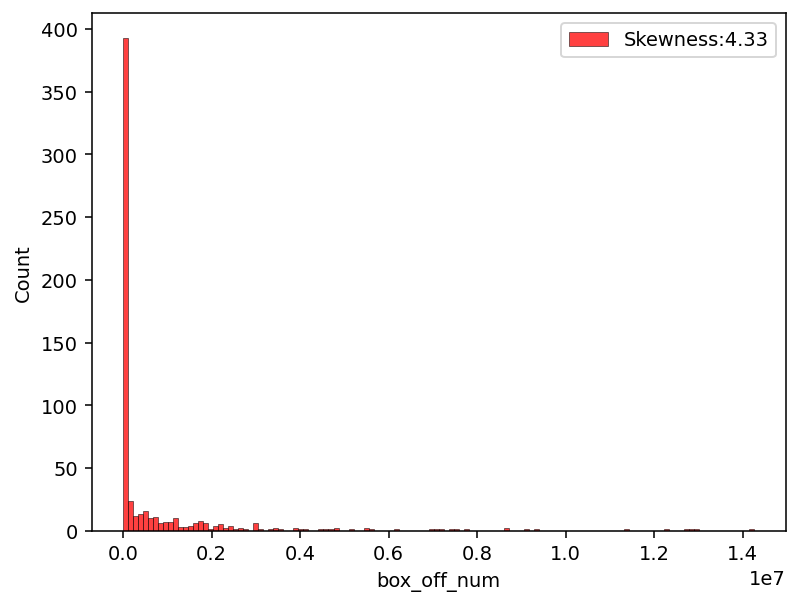

In [29]:
g = sns.histplot(train_df['box_off_num'], color='r', label='Skewness:{:.2f}'.format(train_df['box_off_num'].skew()))
g = g.legend(loc='best')

In [30]:
train_df[train_df['distributor'].str.contains('CGV')][['distributor']]

,distributor
17,CGV 무비꼴라쥬
21,CGV아트하우스
40,CJ CGV
47,CGV 아트하우스
148,CGV아트하우스
255,CGV아트하우스
267,CGV아트하우스
527,CGV 아트하우스
592,CGV아트하우스


In [31]:
train_df[train_df['distributor'].str.contains('리틀빅픽')][['distributor']]

,distributor
18,리틀빅픽처스
60,리틀빅픽처스
119,리틀빅픽쳐스
130,리틀빅픽처스
292,(주)리틀빅픽처스
321,(주)리틀빅픽처스
380,리틀빅픽쳐스
408,리틀빅픽처스
438,리틀빅픽처스


In [32]:
# 영화사 이름 통합
def distr_cleaning (x) :
    if 'CGV' in x or '무비꼴라쥬' in x :
        return 'CGV'
    elif 'E&M' in x or 'CJ엔터테인먼트' in x :
        return 'CJ E&M'
    elif '롯데' in x :
        return '롯데엔터테인먼트'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '마운틴픽처스' in x or '마운틴픽쳐스' in x :
        return '마운틴픽쳐스'
    elif '메가박스중앙플러스엠' in x or '메가박스플러스엠' in x :
        return '메가박스플러스엠'
    elif '쇼박스' in x :
        return '쇼박스'
    elif '조이앤시네마' in x or '조이앤컨텐츠그룹' in x :
        return '조이앤'
    elif '타임스토리' in x :
        return '타임스토리'
    elif '프리비젼' in x :
        return '프리비젼'
    elif '리틀빅픽' in x :
        return '리틀빅픽쳐스'
    else :
        return x

In [33]:
dataset = pd.concat(objs = [train_df, test_df], axis = 0)
dataset

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.00000
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50000,2,387,3,7072501.00000
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25000,4,343,4,6959083.00000
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00000,2,20,6,217866.00000
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00000,1,251,2,483387.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.00000,1,4,4,NaN
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,NaN
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.00000,1,68,7,NaN


In [34]:
dataset['distributor'] = dataset['distributor'].str.replace('\(주\)', '').str.replace(' ', '')
dataset['distributor'] = dataset['distributor'].map(distr_cleaning)

train_df = dataset[:len(train)]
test_df = dataset[len(train):]
test_df = test_df.drop(['box_off_num'], axis = 1)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

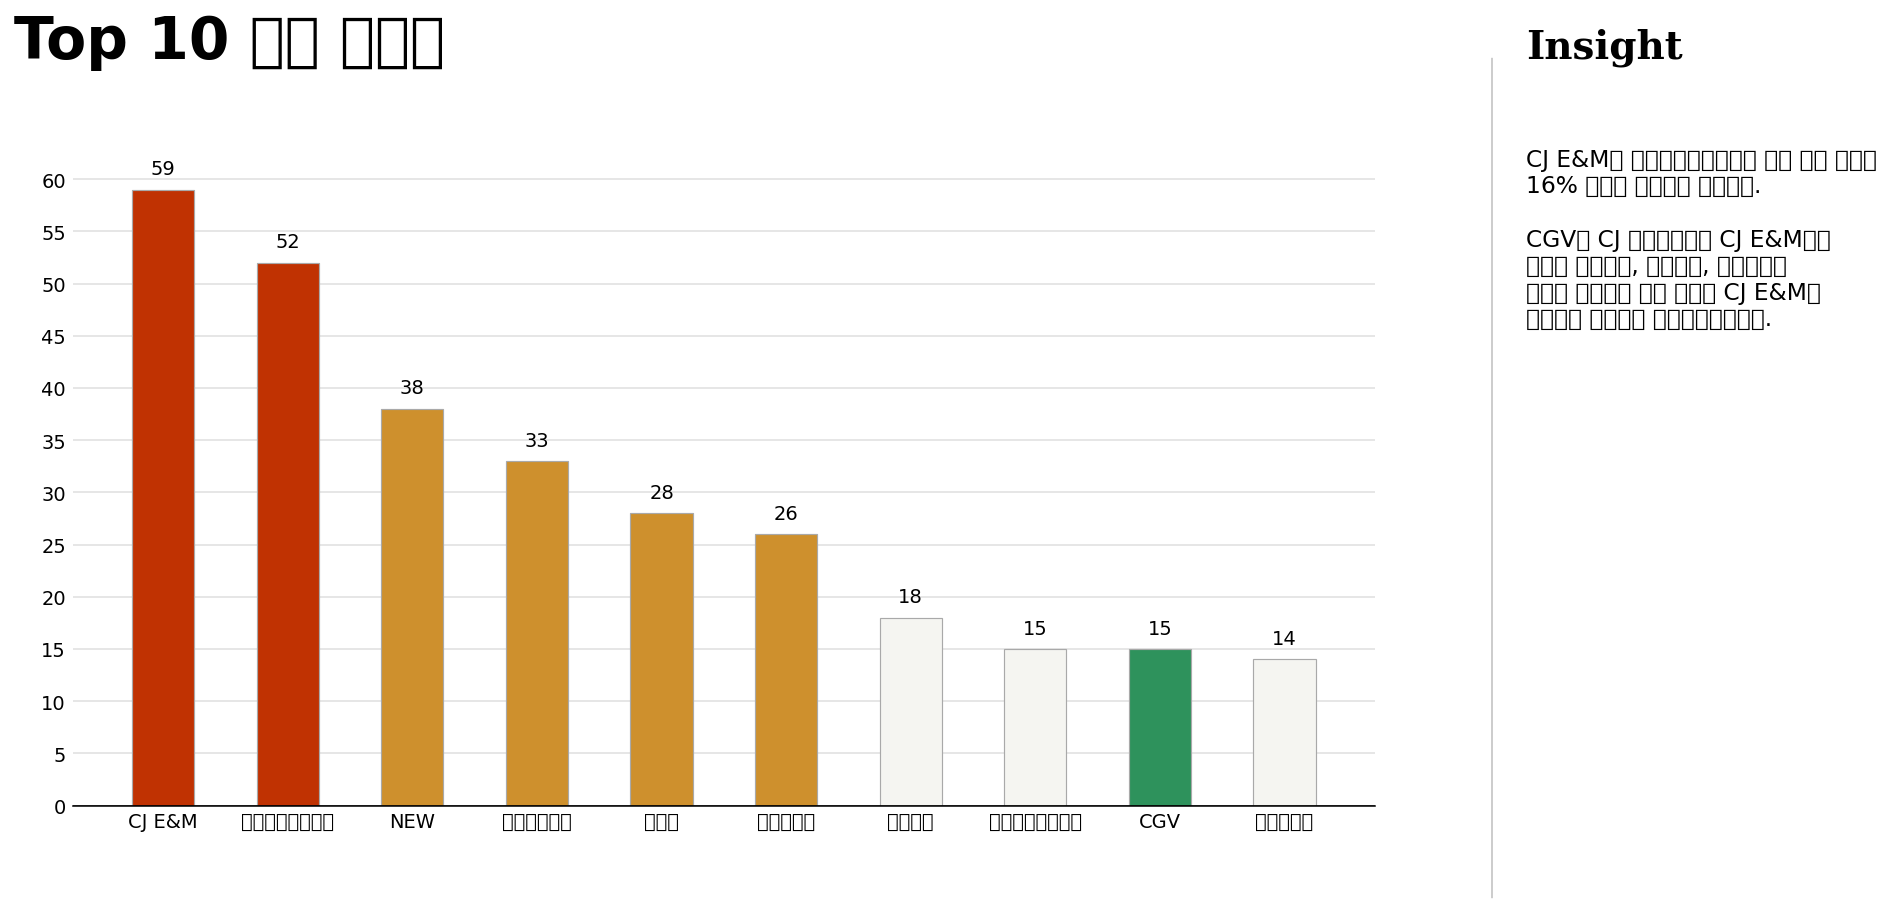

In [35]:
train_df['count'] = 1
data = train_df.groupby(['distributor'])['count'].sum().sort_values(ascending = False)[:10]

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] =  '#C03202' 
color_map[2] = color_map[3] = color_map[4] = color_map[5] = '#CE902D'
color_map[8] = '#2E925C'

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor = 'darkgray',
       linewidth = 0.6, color = color_map)

for i in data.index :
    ax.annotate(f"{data[i]}", 
                   xy = (i, data[i] + 2), 
                   va = 'center', ha = 'center', fontweight = 'normal')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data.index, rotation = 0)

fig.text(0.09, 1, 'Top 10 영화 배급사', fontsize=30, fontweight='bold')

fig.text(0.99, 1, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')

fig.text(0.99, 0.65, '''
CJ E&M과 롯데엔터테인먼트가 전체 영화 배급의 
16% 이상을 차지하고 있습니다.

CGV는 CJ 계열사이지만 CJ E&M과는
다르게 예술영화, 고전영화, 독립영화를
위주로 취급하고 있기 때문에 CJ E&M과
배급사를 분류하여 전처리하였습니다.
'''
         , fontsize=12, fontweight='normal')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 65, 5) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=10)

import matplotlib.lines as lines
l1 = lines.Line2D([0.97, 0.97], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# DACON Baseline Code

In [75]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [77]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [78]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## 데이터 전처리

In [79]:
# # 결측치가 많은 데이터 제거
# train = train.drop(['dir_prev_bfnum'],axis = 1)
# test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [60]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [38]:
# # 감독명 : 너무 다양해서 제거
# train = train.drop(['director'],axis = 1)
# test = test.drop(['director'],axis = 1)

In [80]:
train.distributor.value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [81]:
def distr_cleaning (x) :
    if 'CGV' in x or '무비꼴라쥬' in x :
        return 'CGV'
    elif 'E&M' in x or 'CJ엔터테인먼트' in x :
        return 'CJ E&M'
    elif '롯데' in x :
        return '롯데엔터테인먼트'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '마운틴픽처스' in x or '마운틴픽쳐스' in x :
        return '마운틴픽쳐스'
    elif '메가박스중앙플러스엠' in x or '메가박스플러스엠' in x :
        return '메가박스플러스엠'
    elif '쇼박스' in x :
        return '쇼박스'
    elif '조이앤시네마' in x or '조이앤컨텐츠그룹' in x :
        return '조이앤'
    elif '타임스토리' in x :
        return '타임스토리'
    elif '프리비젼' in x :
        return '프리비젼'
    elif '리틀빅픽' in x :
        return '리틀빅픽쳐스'
    else :
        return x

In [82]:
dataset = pd.concat(objs = [train, test], axis = 0)

dataset['distributor'] = dataset['distributor'].str.replace('\(주\)', '').str.replace(' ', '')
dataset['distributor'] = dataset['distributor'].apply(distr_cleaning)

train = dataset[:len(train)]
test = dataset[len(train):]
test = test.drop(['box_off_num'], axis = 1)

C:\Users\us\AppData\Local\Temp\ipykernel_9252\1170012728.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['distributor'] = dataset['distributor'].str.replace('\(주\)', '').str.replace(' ', '')


In [83]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091.0
596,파파로티,쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438.0
597,살인의 강,마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475.0
598,악의 연대기,CJ E&M,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525.0


In [84]:
test

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ E&M,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ E&M,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1
...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2.590000e+03,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4
241,말하지 못한 비밀,마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7


In [85]:
# # 상위 5개의 배급사를 제외하고 '기타'로처리
# distributor_list = train.distributor.value_counts()[:5]
# def func(distributor):
#     if distributor in distributor_list:
#         return distributor
#     else:
#         return '기타'

# train['distributor'] = train['distributor'].apply(lambda x : func(x))
# test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [86]:
# # 개봉일을 바탕으로 년,월 변수 생성
# train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
# train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
# train =  train.drop(['release_time'],axis = 1)

# test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
# test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
# test =  test.drop(['release_time'],axis = 1)

In [87]:
train['release_time'] = pd.to_datetime(train['release_time'])
train['release_year'] = train['release_time'].dt.year
train['release_month'] = train['release_time'].dt.month

test['release_time'] = pd.to_datetime(test['release_time'])
test['release_year'] = test['release_time'].dt.year
test['release_month'] = test['release_time'].dt.month

C:\Users\us\AppData\Local\Temp\ipykernel_9252\793050723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['release_time'] = pd.to_datetime(train['release_time'])
C:\Users\us\AppData\Local\Temp\ipykernel_9252\793050723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['release_year'] = train['release_time'].dt.year
C:\Users\us\AppData\Local\Temp\ipykernel_9252\793050723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [89]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0,2012,11
1,내부자들,쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0,2015,11
2,은밀하게 위대하게,쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0,2013,6
3,나는 공무원이다,NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0,2012,7
4,불량남녀,쇼박스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0,2010,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091.0,2014,8
596,파파로티,쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438.0,2013,3
597,살인의 강,마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475.0,2010,9
598,악의 연대기,CJ E&M,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525.0,2015,5


In [90]:
test

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,release_year,release_month
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,2010,1
1,아빠가 여자를 좋아해,쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3,2010,1
2,하모니,CJ E&M,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7,2010,1
3,의형제,쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2,2010,2
4,평행 이론,CJ E&M,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2.590000e+03,1,4,4,2015,11
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,2015,10
240,어떤살인,컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,2015,10
241,말하지 못한 비밀,마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7,2015,10


In [91]:
test.at[test[test['time']>= 1000].index[0], 'time'] = int(test['time'].mean())

In [92]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,release_year,release_month
count,243.000000,1.070000e+02,243.000000,243.000000,243.000000,243.000000,243.000000
mean,101.954733,8.916695e+05,0.851852,159.316872,3.477366,2012.753086,6.802469
std,17.908457,1.217341e+06,1.200321,162.976607,2.111192,1.735846,3.484629
min,40.000000,3.400000e+01,0.000000,0.000000,0.000000,2010.000000,1.000000
25%,91.000000,6.250200e+04,0.000000,18.000000,2.000000,2011.000000,4.000000
50%,104.000000,4.931200e+05,0.000000,105.000000,3.000000,2013.000000,7.000000
75%,114.000000,1.080850e+06,1.000000,282.000000,4.000000,2014.000000,10.000000
max,198.000000,6.173100e+06,6.000000,776.000000,16.000000,2015.000000,12.000000


In [93]:
train.loc[338,:]

title                     타부 : 금지된 사랑
distributor                    고구마공작소
genre                          멜로/로맨스
release_time      2015-09-03 00:00:00
time                               78
screening_rat                청소년 관람불가
director                          고구마
dir_prev_bfnum             17615314.0
dir_prev_num                        1
num_staff                          27
num_actor                           3
box_off_num                       8.0
release_year                     2015
release_month                       9
Name: 338, dtype: object

In [94]:
train.at[338, 'dir_prev_bfnum'] = 0

In [95]:
train['dir_prev_bfnum'] = np.where(train['dir_prev_num'] == 0, 0, train['dir_prev_bfnum'])
test['dir_prev_bfnum'] = np.where(test['dir_prev_num'] == 0, 0, test['dir_prev_bfnum'])

C:\Users\us\AppData\Local\Temp\ipykernel_9252\936088430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['dir_prev_bfnum'] = np.where(train['dir_prev_num'] == 0, 0, train['dir_prev_bfnum'])


In [97]:
data = train.groupby(['director'])['box_off_num'].mean().sort_values(ascending = False)

In [99]:
data

director
윤제균    14262766.0
최동훈    12845252.0
양우석    11374879.0
봉준호     9350351.0
한재림     9135806.0
          ...    
진광교          36.0
이세일          10.0
고구마           8.0
김정호           2.0
노성수           1.0
Name: box_off_num, Length: 472, dtype: float64

In [100]:
def director_cleaning (df, data) :
    
    for idx, value in enumerate(data) :
        # 감독을 매칭하기 위해 df와 data에서 동일한 감독 이름이 나타나는 인덱스를 찾는다.
        temp_idx = df[df['director'] == data.index[idx]].index 

        # 감독 이름이 동일한 인덱스에서 이전 관객수 값이 null이라면 감독의 평균 관객수로 결측치를 채운다.
        for df_idx in temp_idx :
            if pd.isnull(df['dir_prev_bfnum'][df_idx]) == True :
                df.at[df_idx, 'dir_prev_bfnum'] = value
    
    return df

In [101]:
train = director_cleaning(train, data)
test = director_cleaning(test, data)

In [102]:
test['dir_prev_bfnum'] = test['dir_prev_bfnum'].fillna(0)

In [103]:
from sklearn.preprocessing import LabelEncoder

corr_df = train.copy()

corr_df = corr_df.drop(columns = ['title', 'release_time'])

corr_df_object_cols = corr_df.dtypes[corr_df.dtypes == 'O'].index

for col in corr_df_object_cols:
    lbl = LabelEncoder() 
    corr_df[col] = lbl.fit_transform(list(corr_df[col].values)) 

corr_df_cols = corr_df.columns[:] 
corr_df_cor = abs(corr_df[corr_df_cols].corr(method = 'spearman'))
corr_df_cor = pd.DataFrame(corr_df_cor['box_off_num']).sort_values('box_off_num', ascending = False)
corr_df_cor.columns = ['corr']

<AxesSubplot: >

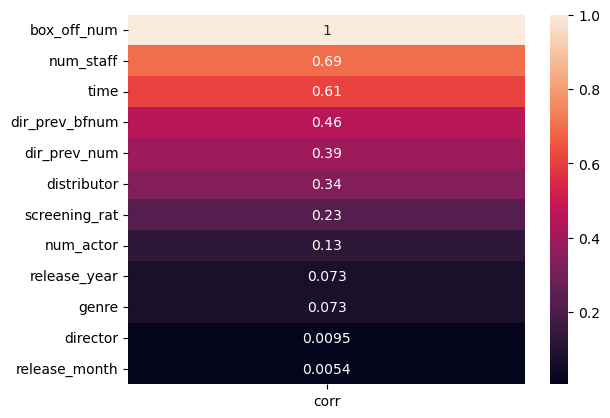

In [104]:
sns.heatmap(corr_df_cor, annot=True)

In [105]:
dataset = pd.concat(objs = [train, test], axis = 0)

In [106]:
dataset['screening_rat'] = dataset['screening_rat'].apply(lambda x : 0 \
    if x == '전체 관람가' else 1 if x == '12세 관람가' else 2 if x == '15세 관람가' \
        else 3)

In [107]:
dataset['genre_rank'] = dataset['genre'].map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})

In [108]:
train_distr_rank = train.groupby('distributor').box_off_num.mean().reset_index(name = 'distr_rank').sort_values(by = 'distr_rank')
train_pre_distr_rank = train.groupby('distributor').dir_prev_bfnum.mean().reset_index(name = 'pre_distr_rank').sort_values(by = 'pre_distr_rank')
test_pre_distr_rank = test.groupby('distributor').dir_prev_bfnum.mean().reset_index(name = 'pre_distr_rank').sort_values(by = 'pre_distr_rank')

In [109]:
train_total_distr_rank = pd.merge(train_distr_rank, train_pre_distr_rank, how = 'inner')
train_total_distr_rank['train_distr_rank'] = train_total_distr_rank['distr_rank'] + train_total_distr_rank['pre_distr_rank']
train_total_distr_rank = train_total_distr_rank.drop(['distr_rank', 'pre_distr_rank'], axis = 1)
train_total_distr_rank

,distributor,train_distr_rank
0,인피니티엔터테인먼트,2.000000e+00
1,고구마공작소,8.000000e+00
2,사람과사람들,4.200000e+01
3,위드시네마,4.600000e+01
4,나우콘텐츠,1.610000e+03
...,...,...
142,NEW,2.883262e+06
143,CJ E&M,3.311571e+06
144,영구아트무비,1.039708e+07
145,아이필름코퍼레이션,3.117932e+06


In [110]:
dataset = pd.merge(dataset, train_total_distr_rank, how = 'left')
test_isna_distr = dataset[dataset.train_distr_rank.isnull()][['distributor']]
test_isna_distr

,distributor
605,모쿠슈라
607,루믹스미디어
612,노근리프로덕션
620,리얼라이즈픽쳐스
624,청년필름
629,리아코어콘텐츠
639,핑크로봇필름
640,CinemaSAM
646,갑종필름
647,필마픽쳐스


In [111]:
test_total_distr_rank = pd.merge(test_isna_distr, test_pre_distr_rank, how = 'left')
test_total_distr_rank['test_distr_rank'] = test_total_distr_rank['pre_distr_rank'] *2
test_total_distr_rank = test_total_distr_rank.drop(['pre_distr_rank'], axis = 1)
test_total_distr_rank

,distributor,test_distr_rank
0,모쿠슈라,0.0
1,루믹스미디어,0.0
2,노근리프로덕션,68.0
3,리얼라이즈픽쳐스,0.0
4,청년필름,0.0
5,리아코어콘텐츠,2572.0
6,핑크로봇필름,0.0
7,CinemaSAM,326388.0
8,갑종필름,0.0
9,필마픽쳐스,0.0


In [112]:
total_distr_rank = pd.merge(train_total_distr_rank, test_total_distr_rank, how = 'outer')
total_distr_rank = total_distr_rank.fillna(0)
total_distr_rank['distr_rank'] = total_distr_rank['train_distr_rank'] + total_distr_rank['test_distr_rank']
total_distr_rank = total_distr_rank.sort_values(by = 'distr_rank')
total_distr_rank = total_distr_rank.drop_duplicates(['distributor'], keep = 'first')
total_distr_rank = total_distr_rank.drop(['train_distr_rank', 'test_distr_rank'], axis = 1)
total_distr_rank['distr_rank'] = [i + 1 for i in range(total_distr_rank.shape[0])]
total_distr_rank

,distributor,distr_rank
174,컨텐츠온미디어,1
150,리얼라이즈픽쳐스,2
151,청년필름,3
153,핑크로봇필름,4
155,갑종필름,5
...,...,...
145,아이필름코퍼레이션,170
143,CJ E&M,171
173,다세포클럽,172
146,쇼박스,173


In [113]:
dataset = pd.merge(dataset, total_distr_rank, how = 'left')
dataset = dataset.drop(['train_distr_rank'], axis = 1)

In [114]:
train_dir_rank = train.groupby('director').box_off_num.median().reset_index(name = 'dir_rank').sort_values(by = 'dir_rank')
train_pre_dir_rank = train.groupby('director').dir_prev_bfnum.mean().reset_index(name = 'pre_dir_rank').sort_values(by = 'pre_dir_rank')
test_pre_dir_rank = test.groupby('director').dir_prev_bfnum.mean().reset_index(name = 'pre_dir_rank').sort_values(by = 'pre_dir_rank')

In [115]:
train_total_dir_rank = pd.merge(train_dir_rank, train_pre_dir_rank, how = 'inner')
train_total_dir_rank['train_dir_rank'] = train_total_dir_rank['dir_rank'] + train_total_dir_rank['pre_dir_rank']
train_total_dir_rank = train_total_dir_rank.drop(['dir_rank', 'pre_dir_rank'], axis = 1)
train_total_dir_rank

,director,train_dir_rank
0,노성수,1.000000e+00
1,김정호,2.000000e+00
2,고구마,8.000000e+00
3,이세일,1.000000e+01
4,진광교,3.600000e+01
...,...,...
467,한재림,1.037858e+07
468,봉준호,9.350351e+06
469,양우석,1.137488e+07
470,최동훈,1.671234e+07


In [116]:
dataset = pd.merge(dataset, train_total_dir_rank, how = 'left')

In [117]:
test_isna_dir = dataset[dataset.train_dir_rank.isnull()][['director']]
test_isna_dir

,director
600,김형준
601,이광재
602,강대규
604,권호영
606,홍형숙
...,...
836,이서
838,안슬기
839,이일하
840,안용훈


In [118]:
test_total_dir_rank = pd.merge(test_isna_dir, test_pre_dir_rank, how = 'left')
test_total_dir_rank['test_dir_rank'] = test_total_dir_rank['pre_dir_rank'] *2
test_total_dir_rank = test_total_dir_rank.drop(['pre_dir_rank'], axis = 1)
test_total_dir_rank

,director,test_dir_rank
0,김형준,6.010580e+05
1,이광재,6.854005e+05
2,강대규,8.413221e+06
3,권호영,6.347600e+04
4,홍형숙,0.000000e+00
...,...,...
149,이서,4.198058e+06
150,안슬기,5.180000e+03
151,이일하,0.000000e+00
152,안용훈,0.000000e+00


In [119]:
total_dir_rank = pd.merge(train_total_dir_rank, test_total_dir_rank, how = 'outer')
total_dir_rank = total_dir_rank.fillna(0)
total_dir_rank['dir_rank'] = total_dir_rank['train_dir_rank'] + total_dir_rank['test_dir_rank']
total_dir_rank = total_dir_rank.sort_values(by = 'dir_rank')
total_dir_rank = total_dir_rank.drop_duplicates(['director'], keep = 'first')
total_dir_rank = total_dir_rank.drop(['train_dir_rank', 'test_dir_rank'], axis = 1)
total_dir_rank['dir_rank'] = [i + 1 for i in range(total_dir_rank.shape[0])]
total_dir_rank

,director,dir_rank
573,김동현,1
616,허선,2
500,박철순,3
480,장동홍,4
501,소준문,5
...,...,...
456,장재현,610
491,권혁재,611
459,강형철,612
471,윤제균,613


In [120]:
dataset = pd.merge(dataset, total_dir_rank, how = 'left')
dataset = dataset.drop(['train_dir_rank'], axis = 1)

In [121]:
dataset = dataset.drop(columns = ['title', 'release_time', 'distributor', 'genre', 'director'])

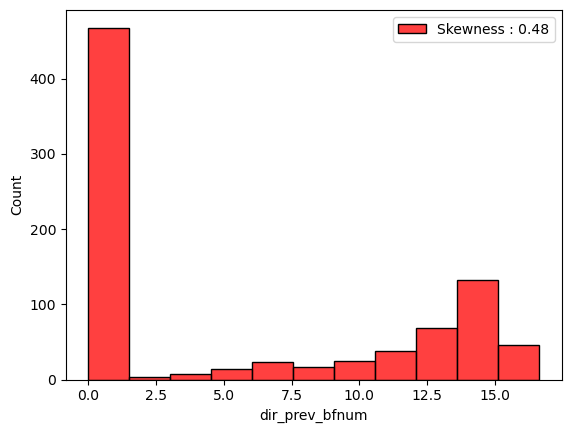

In [122]:
temp_df = dataset.copy()
temp_df['dir_prev_bfnum'] = boxcox1p(temp_df['dir_prev_bfnum'], 0.005)

g = sns.histplot(temp_df['dir_prev_bfnum'], color = 'r', label = 'Skewness : %.2f'%(temp_df['dir_prev_bfnum'].skew()))
g = g.legend(loc = 'best')

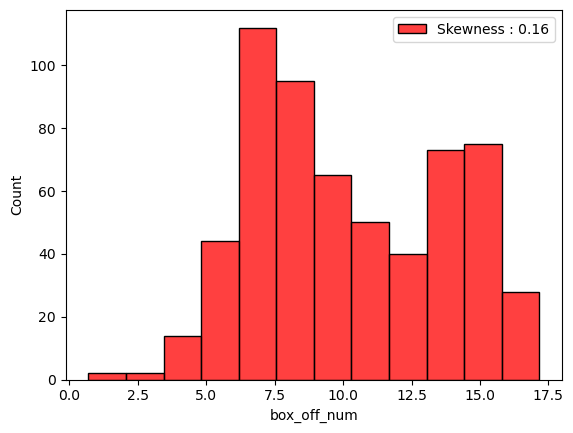

In [124]:
temp_df = train.copy()
temp_df['box_off_num'] = boxcox1p(temp_df['box_off_num'], 0.005)

g = sns.histplot(temp_df['box_off_num'], color = 'r', label = 'Skewness : %.2f'%(temp_df['box_off_num'].skew()))
g = g.legend(loc = 'best')

In [125]:
dataset['dir_prev_bfnum'] = boxcox1p(dataset['dir_prev_bfnum'], 0.005)
train = dataset[:len(train)]
test = dataset[len(train):]
test = test.drop(['box_off_num'], axis = 1)

train['box_off_num'] = boxcox1p(train['box_off_num'], 0.005)

C:\Users\us\AppData\Local\Temp\ipykernel_9252\73462846.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['box_off_num'] = boxcox1p(train['box_off_num'], 0.005)


In [127]:
train

,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,genre_rank,distr_rank,dir_rank
0,96,3,0.000000,0,91,2,10.317777,2012,11,11,166,310
1,130,3,14.464436,2,387,3,16.410267,2015,11,12,173,551
2,123,2,12.691316,4,343,4,16.392775,2013,6,11,173,595
3,101,0,10.339836,2,20,6,12.677209,2012,7,9,169,377
4,108,2,0.694350,1,251,2,13.526349,2010,11,9,173,416
...,...,...,...,...,...,...,...,...,...,...,...,...
595,111,3,8.424254,1,510,7,14.720787,2014,8,8,169,490
596,127,2,13.553983,1,286,6,14.883534,2013,3,8,173,529
597,99,3,0.000000,0,123,4,7.969070,2010,9,7,116,220
598,102,2,0.000000,0,431,4,15.146715,2015,5,12,171,527


## 모델 정의 및 학습

In [136]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [137]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

RandomForestRegressor()

In [138]:
pred = model.predict(test)

In [139]:
submission = pd.read_csv('submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [140]:
submission['box_off_num'] = pred

In [141]:
submission

,title,box_off_num
0,용서는 없다,13.254097
1,아빠가 여자를 좋아해,13.141104
2,하모니,15.039675
3,의형제,15.619325
4,평행 이론,11.354481
...,...,...
238,해에게서 소년에게,8.321900
239,울보 권투부,1.986137
240,어떤살인,3.030848
241,말하지 못한 비밀,9.280314


In [142]:
submission.to_csv('베이스라인.csv',index = False)